In [ ]:
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os

In [3]:
elephant = os.path.join("/kaggle/input/audio-data/data/elephants/37232144-8b48-4915-a237-779c50aa4366.wav")

not_elephants = os.path.join("/kaggle/input/audio-data/data/NOT - ELEPHANTS/a26.wav")

In [4]:
def load_wav_16k_mono(filename):
    filename = tf.cast(filename, tf.string)
#     Load encoded wav file
    file_contents = tf.io.read_file(filename)
#     Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
#     Remove trailing axis
    wav = tf.squeeze(wav, axis=1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     Convert from 441khz to 16khz(Aimplitude of the audio signal)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
    return wav

In [5]:
wav = load_wav_16k_mono(elephant)
nwav = load_wav_16k_mono(not_elephants)
wav,nwav

(<tf.Tensor: shape=(185759,), dtype=float32, numpy=
 array([-4.1956614e-08,  1.1712106e-07, -6.9363871e-08, ...,
         2.9582824e-04,  3.2537087e-04,  1.6638995e-04], dtype=float32)>,
 <tf.Tensor: shape=(479180,), dtype=float32, numpy=
 array([ 2.9468833e-07, -1.7679330e-06, -1.1979821e-06, ...,
        -7.6772898e-02, -7.3214084e-02, -1.3188022e-01], dtype=float32)>)

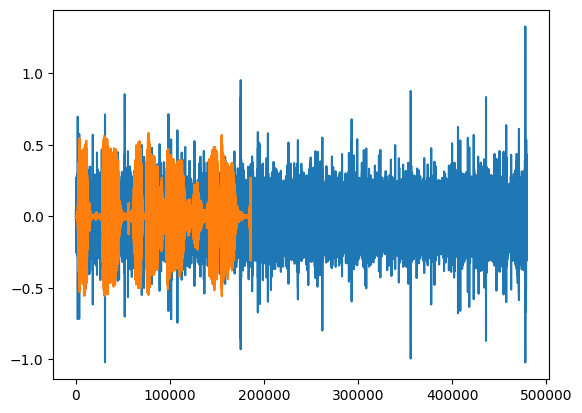

In [6]:
plt.plot(nwav)
plt.plot(wav)
plt.show() 

# Creating a tensorflow data set

### - Converting raw audio files (wav form) which was  resampled using tensorflow decode wav method into spectogram(image representation) using STFT(short time fourier transform)

In [7]:
pos = os.path.join('/kaggle/input/audio-data/data/elephants')
neg = os.path.join('/kaggle/input/audio-data/data/NOT - ELEPHANTS')

In [8]:
pos_files = tf.data.Dataset.list_files(pos+'/*.wav')
neg_files = tf.data.Dataset.list_files(neg+'/*.wav')

In [9]:
pos_files.as_numpy_iterator().next()
neg_files.as_numpy_iterator().next()          

b'/kaggle/input/audio-data/data/NOT - ELEPHANTS/a2.wav'

In [10]:
positives = tf.data.Dataset.zip((pos_files, tf.data.Dataset.from_tensor_slices((tf.ones(len(pos_files))))))
negatives = tf.data.Dataset.zip((neg_files, tf.data.Dataset.from_tensor_slices((tf.zeros(len(neg_files))))))
data = positives.concatenate(negatives)

In [11]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/kaggle/input/audio-data/data/elephants/cde97a8a-9b2c-4b73-a2b5-3bfb008b69f0.wav',
 1.0)

### Calculating wave cycle length

In [12]:
lengths = []
for file in os.listdir(os.path.join('/kaggle/input/audio-data/data/elephants')):
    tensor_wave = load_wav_16k_mono(os.path.join('/kaggle/input/audio-data/data/elephants',file))
    lengths.append(len(tensor_wave))

In [13]:
os.listdir(os.path.join('/kaggle/input/audio-data/data/elephants'))

['c9b5a6f3-91e3-4265-98f0-a0dd1db541a0.wav',
 '48a4cbca-653d-4a0c-adec-ba4dfbd7875d.wav',
 '39d660bd-d00b-4f9f-8b29-c6e414002632.wav',
 'b78316aa-84b7-4829-b30f-b60e8389b8a8.wav',
 '8067a1e5-ee21-4609-bd46-f2004c74b713.wav',
 '92cecdfa-71e8-4942-89e0-3f513bc7e0cb.wav',
 '37232144-8b48-4915-a237-779c50aa4366.wav',
 'e46ea768-357b-4475-8fbc-78c2c3ca9cc1.wav',
 '85a60fd2-1bb2-4633-900b-fcb3c5c5cdd1.wav',
 'cde97a8a-9b2c-4b73-a2b5-3bfb008b69f0.wav',
 '03b2726f-786e-48c4-baf7-07568f8c12c0.wav',
 'cf000798-0a57-422a-8b22-51e219104404.wav',
 '7d7d7aea-9a1a-4c90-8949-8f3f874d3306.wav',
 'e24a3c3a-2f3e-457f-b6ca-3f8c66128908.wav',
 '72640dce-04dc-416d-a79a-50abb4677865.wav',
 '8fb55e4b-7fa0-419d-8de9-2d876113ce1a.wav',
 '27c6348d-cfb2-4324-8e1a-60d4fc8c386e.wav',
 '096b579b-1e1e-4543-91f6-5d8c884d6350.wav',
 '98bd60e3-4bad-47cc-a1ad-695c91a9093e.wav',
 'b49876ae-d80b-44e7-ae60-c124e5e64214.wav',
 '83fe6c7e-5f54-4cee-90f1-aacd9c86978e.wav',
 '5c7ec765-7815-4567-acbd-d7cb70fc2a5e.wav',
 '43c7cdc4

In [156]:
lengths

[98452,
 108483,
 389352,
 68359,
 622666,
 57957,
 185759,
 44582,
 286069,
 70960,
 679508,
 392324,
 60557,
 276781,
 190960,
 230341,
 43839,
 72817,
 367804,
 284955,
 200620,
 26749,
 31579,
 236657,
 73932,
 44953,
 134489,
 40867,
 40124,
 44582,
 25634,
 81362,
 70217,
 33065,
 260063,
 154180,
 80248,
 92879,
 364460,
 392695,
 53870,
 124830,
 43467,
 281240,
 60557]

# calculate Mean, Min and Max

In [157]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=167240>

In [158]:
679509/16000

42.4693125

### From our statistics, we can concur that the min duration of the audio file is 1.7 seconds and the max duration for the audio file is 42.5

In [14]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=25634>

In [160]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=679508>

In [161]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:167800]
    zero_padding = tf.zeros([167800] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    
#     Use short time Fourier transform(stft) to convert to a spectogram
    spectogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectogram = tf.abs(spectogram)
    spectogram = tf.expand_dims(spectogram, axis=2)
    
    return spectogram, label

In [162]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [163]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=10000)
data = data.batch(2)
data = data.prefetch(1)
iterator = iter(data)

In [164]:
len(data)

40

# Creating Training and Testing partitions

## Creating a tensorflow pipeline

In [165]:
len(data)*.7

28.0

In [166]:
train = data.take(2)
test = data.skip(2).take(1)

In [167]:
samples, labels = train.as_numpy_iterator().next()

In [168]:
samples.shape

(2, 5234, 257, 1)

In [169]:
labels

array([1., 0.], dtype=float32)

# Building a Deep Learning model

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D
import keras.backend as K


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [171]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'leakyrelu', input_shape=(5234, 257, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3), activation = 'leakyrelu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
K.clear_session()

In [172]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Recall()])

In [173]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 5232, 255, 8)      80        
                                                                 
 conv2d_21 (Conv2D)          (None, 5230, 253, 8)      584       
                                                                 
 flatten_10 (Flatten)        (None, 10585520)          0         
                                                                 
 dense_11 (Dense)            (None, 16)                169368336 
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 169,369,017
Trainable params: 169,369,017
Non-trainable params: 0
_________________________________________________________________


In [174]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
2/2 [==============================] - 3s 359ms/step - loss: 0.4180 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1564.0391 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/4
2/2 [==============================] - 0s 113ms/step - loss: 1444.7388 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 493.3701 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/4
2/2 [==============================] - 0s 113ms/step - loss: 342.0028 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 577.6249 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/4
2/2 [==============================] - 0s 113ms/step - loss: 201.7720 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_recall: 1.0000 - val_precision: 1.0000


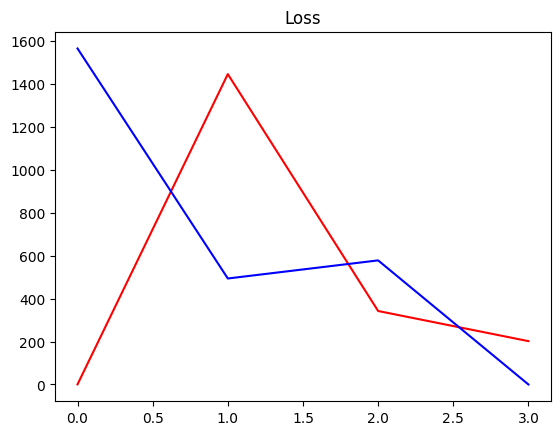

In [175]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

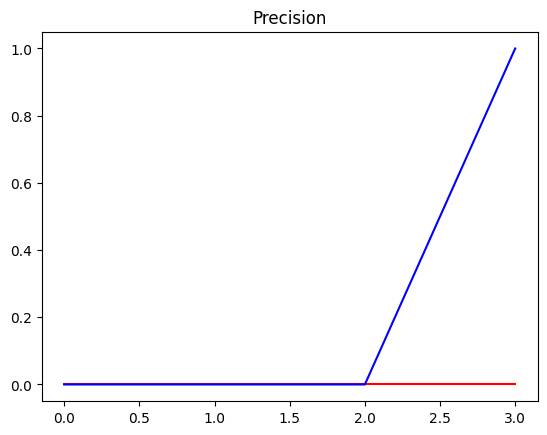

In [176]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

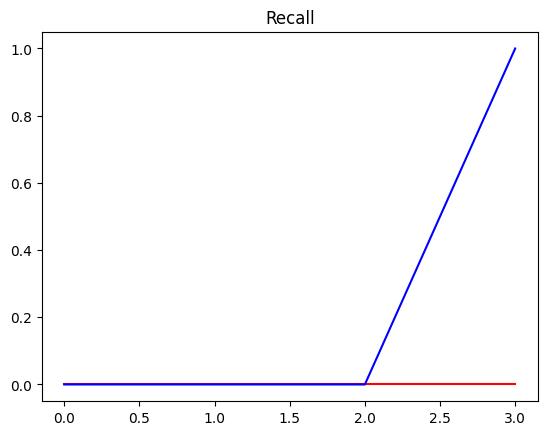

In [177]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [182]:
X_test, y_test = test.as_numpy_iterator().next()

In [183]:
yhat = model.predict(X_test)e

1/1 [==============================] - 0s 25ms/step


In [184]:
yhat # prediction using a testing set

array([[0.],
       [0.]], dtype=float32)

In [187]:
from tensorflow import keras
import os
model.save('/kaggle/working/distress_call_predicter.h5')
os.rename('/kaggle/working/distress_call_predicter.h5', '/kaggle/working/distress_call_predicter.keras')
